In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CSE/Data/DL_Datasets/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
X = df.drop(columns = ['Exited'])
y  = df['Exited']

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 2)

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [ ]:
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [ ]:
X_train_scaled.shape

(8000, 11)

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(11,activation = 'relu', input_dim = 11))
model.add(Dense(11,activation = 'relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 11)                132       
                                                                 
 dense_6 (Dense)             (None, 11)                132       
                                                                 
 dense_7 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'Adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3176 - accuracy: 0.8691 - val_loss: 0.3366 - val_accuracy: 0.8656
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3180 - accuracy: 0.8698 - val_loss: 0.3354 - val_accuracy: 0.8644
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3179 - accuracy: 0.8705 - val_loss: 0.3375 - val_accuracy: 0.8612
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3177 - accuracy: 0.8695 - val_loss: 0.3360 - val_accuracy: 0.8644
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3179 - accuracy: 0.8695 - val_loss: 0.3340 - val_accuracy: 0.8675
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3174 - accuracy: 0.8695 - val_loss: 0.3389 - val_accuracy: 0.8625
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3179 - accuracy: 0.8697 - val_loss: 0.3350 - val_accuracy: 0.8637

In [ ]:
model.layers[0].get_weights()

[array([[-0.16935831, -0.1862666 , -0.0734012 ,  0.15479167, -0.04945647,
         -0.11632625, -0.21708484,  0.17206109,  0.07496247,  0.1579044 ,
         -0.15769583],
        [-0.82063174,  0.89403117, -0.59909487, -0.30926695, -0.5926918 ,
          0.6133307 ,  0.39212433, -0.2193517 ,  0.03064167, -0.49614996,
          0.4419047 ],
        [ 0.33942363,  0.13253523, -0.44363824, -0.24553329,  0.0942483 ,
          0.33191872,  0.08331825, -0.05267136,  0.2035631 ,  0.09839505,
          0.06260569],
        [ 0.24383152, -0.991056  ,  0.7828175 , -0.36733145, -0.6278946 ,
          0.8885323 , -0.3548045 ,  0.22300589, -0.44155282, -0.7137005 ,
          0.37975398],
        [-0.04226846, -0.13802905, -0.18736136,  0.27836496,  0.38660708,
         -0.3363001 , -1.1990918 , -0.34255183, -0.3220687 , -0.9479924 ,
          1.144139  ],
        [-0.01957848, -0.1384365 , -0.5072898 , -0.09301239, -0.10975765,
          0.07887095, -0.33428398,  0.37591842,  0.05641805, -0.0299982

In [ ]:
model.layers[1].get_weights()

[array([[ 1.11398986e-02, -3.84575397e-01, -1.35134053e+00,
          1.46492809e-01, -4.92595285e-01, -5.39853752e-01,
          3.86028826e-01,  5.91951787e-01,  3.97060335e-01,
         -6.64511740e-01,  1.13434479e-01],
        [ 2.61333227e-01, -1.66638985e-01,  4.52748865e-01,
          7.64730394e-01, -3.30500752e-01,  2.83152312e-01,
          5.20671427e-01, -4.16527055e-02, -1.70033753e-01,
         -7.69514441e-01, -9.50630903e-01],
        [-3.92428845e-01, -6.63911760e-01,  7.34125525e-02,
         -3.42685163e-01,  3.51888895e-01, -5.33333659e-01,
          5.89544661e-02,  1.12623230e-01,  3.33614618e-01,
         -1.87542394e-01, -3.12011778e-01],
        [ 5.05826660e-02,  5.19394398e-01,  1.77101731e-01,
         -1.09717645e-01,  3.62850040e-01, -5.10029078e-01,
          5.82567632e-01, -7.56453723e-02, -1.38304371e-04,
         -9.30140674e-01, -3.38079631e-02],
        [ 4.19329941e-01,  5.08957393e-02, -9.42002773e-01,
         -2.53275156e-01,  3.59683424e-01,  

In [ ]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [ ]:
y_pred = np.where(y_log>0.5,1,0)

In [ ]:
y_pred

array([[0],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8545

In [ ]:
import matplotlib.pyplot as plt

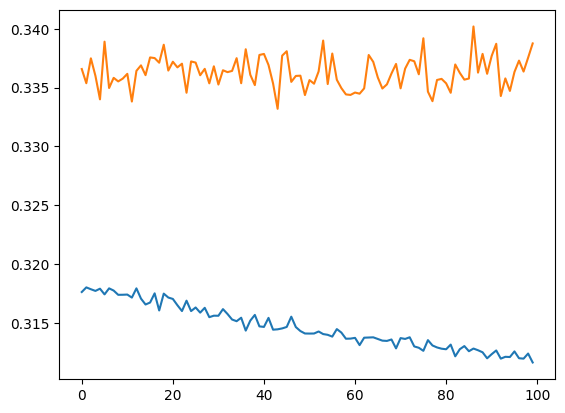

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

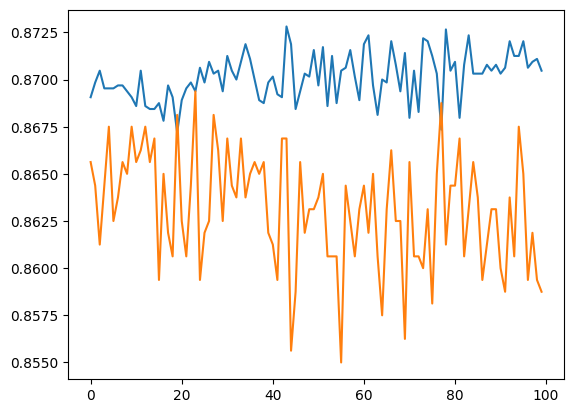

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])